# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import plotly.express as px
%matplotlib inline

# Importing the dataset

In [2]:
data=pd.read_csv('Car_Data.csv')

In [3]:
data

,ID,Brand,Model,Year,Color,Mileage,Price,Condition
0,1,Mazda,Generic Model 3,2003,Blue,22932,65732,New
1,2,Jaguar,Generic Model 2,2003,Silver,89937,58620,New
2,3,Land Rover,Generic Model 2,2022,Green,36616,50574,New
3,4,Porsche,Generic Model 2,1997,Black,82812,35436,Used
4,5,Land Rover,Generic Model 3,2000,Black,184616,63880,Used
...,...,...,...,...,...,...,...,...
99995,99996,Lexus,Generic Model 1,2018,Red,24034,31762,New
99996,99997,Nissan,Generic Model 1,2015,Green,30029,78376,New
99997,99998,Land Rover,Generic Model 1,2009,White,42313,45681,Used
99998,99999,Toyota,Tacoma,2010,White,120989,15085,Used


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   ID         100000 non-null  int64 
 1   Brand      100000 non-null  object
 2   Model      100000 non-null  object
 3   Year       100000 non-null  int64 
 4   Color      100000 non-null  object
 5   Mileage    100000 non-null  int64 
 6   Price      100000 non-null  int64 
 7   Condition  100000 non-null  object
dtypes: int64(4), object(4)
memory usage: 6.1+ MB


In [5]:
data.isnull().sum()

ID           0
Brand        0
Model        0
Year         0
Color        0
Mileage      0
Price        0
Condition    0
dtype: int64

In [6]:
data.columns

Index(['ID', 'Brand', 'Model', 'Year', 'Color', 'Mileage', 'Price',
       'Condition'],
      dtype='object')

In [7]:
data.drop('ID',axis=1,inplace=True)

In [8]:
data

,Brand,Model,Year,Color,Mileage,Price,Condition
0,Mazda,Generic Model 3,2003,Blue,22932,65732,New
1,Jaguar,Generic Model 2,2003,Silver,89937,58620,New
2,Land Rover,Generic Model 2,2022,Green,36616,50574,New
3,Porsche,Generic Model 2,1997,Black,82812,35436,Used
4,Land Rover,Generic Model 3,2000,Black,184616,63880,Used
...,...,...,...,...,...,...,...
99995,Lexus,Generic Model 1,2018,Red,24034,31762,New
99996,Nissan,Generic Model 1,2015,Green,30029,78376,New
99997,Land Rover,Generic Model 1,2009,White,42313,45681,Used
99998,Toyota,Tacoma,2010,White,120989,15085,Used


In [9]:
data['Brand'].unique()

array(['Mazda', 'Jaguar', 'Land Rover', 'Porsche', 'Volvo', 'Chevrolet',
       'Ford', 'Hyundai', 'Tesla', 'Lexus', 'Mercedes-Benz', 'Subaru',
       'Volkswagen', 'Audi', 'Honda', 'Jeep', 'BMW', 'Nissan', 'Kia',
       'Toyota'], dtype=object)

In [10]:
data['Brand'].nunique()

20

In [11]:
data['Brand'].value_counts()

Brand
Ford             5133
Lexus            5125
Tesla            5088
Volvo            5087
Toyota           5065
Chevrolet        5064
Nissan           5054
Porsche          5026
Honda            5017
Mercedes-Benz    4986
Volkswagen       4983
Jeep             4971
Hyundai          4963
Audi             4955
Jaguar           4933
BMW              4921
Land Rover       4919
Kia              4911
Mazda            4900
Subaru           4899
Name: count, dtype: int64

In [12]:
data['Condition'].unique()

array(['New', 'Used'], dtype=object)

In [13]:
data['Condition'].value_counts()

Condition
Used    50033
New     49967
Name: count, dtype: int64

In [14]:
data['Year'].unique()

array([2003, 2022, 1997, 2000, 2014, 2009, 1992, 2001, 1998, 1999, 1993,
       2016, 2008, 2011, 2019, 2004, 1990, 2012, 2010, 2006, 1996, 2005,
       1994, 2021, 2007, 2013, 2015, 1995, 2002, 2018, 1991, 2017, 2020],
      dtype=int64)

In [15]:
data['Year'].nunique()

33

In [16]:
data['Year'].value_counts()

Year
2017    3187
2014    3114
1998    3112
2008    3096
1994    3090
2020    3082
2022    3079
2004    3072
1999    3071
2021    3070
2002    3061
2012    3057
1992    3048
2009    3041
2010    3025
2000    3024
2015    3022
2013    3022
2005    3018
1995    3013
2016    3008
1990    3006
1997    3002
2011    2996
1996    2993
1991    2988
2019    2986
2006    2980
2007    2979
1993    2975
2003    2968
2001    2911
2018    2904
Name: count, dtype: int64

# Groupby operations

In [17]:
data.groupby(['Condition'])['Mileage'].mean().reset_index()

,Condition,Mileage
0,New,99552.789361
1,Used,100085.648952


In [18]:
data.groupby(['Condition'])['Price'].mean().reset_index()

,Condition,Price
0,New,42540.140553
1,Used,42528.905602


In [19]:
data.groupby(['Brand','Condition']).agg({'Mileage':'mean','Price':'mean'})

Mileage         Price
Brand         Condition                             
Audi          New        100299.836759  42983.703748
              Used       102497.180275  42792.104285
BMW           New        100973.284955  43025.643500
              Used       100452.948283  42607.527273
Chevrolet     New        100431.057188  42016.898332
              Used       100121.772977  42714.446190
Ford          New         97573.332812  42168.291406
              Used        99285.596191  41859.226195
Honda         New         97841.706667  42155.553131
              Used       103339.635720  41750.376082
Hyundai       New        100000.312804  43024.437601
              Used        99938.767936  42568.725451
Jaguar        New        100621.679565  42547.010077
              Used        97981.538336  42640.021615
Jeep          New        100160.770101  43042.721212
              Used        99450.627404  43031.066506
Kia           New         99445.524296  42377.597387
              Used       100509.962226  42385.958164
Land Rover    New         98017.366886  42600.738291
              Used        98496.957344  43068.407243
Lexus         New         99644.490609  42670.112687
              Used       101066.841415  42439.862083
Mazda         New         99865.474434  42406.348701
              Used       100206.877884  43064.089499
Mercedes-Benz New         98782.703942  42703.483508
              Used        99931.984000  42315.246800
Nissan        New         98908.721766  42257.632278
              Used       100532.560321  42361.641683
Porsche       New        100316.562348  43284.748583
              Used        98205.942879  42195.951095
Subaru        New         99582.474490  42603.682889
              Used        99417.320715  43147.097405
Tesla         New        100894.293413  42224.356487
              Used       100395.780875  42524.557491
Toyota        New         99748.261821  42203.227433
              Used        99572.699521  42949.325219
Volkswagen    New         99075.090190  42231.178402
              Used       100119.556823  42023.795519
Volvo         New         98945.567194  42325.854150
              Used       100127.224873  42214.268283

In [20]:
data.columns

Index(['Brand', 'Model', 'Year', 'Color', 'Mileage', 'Price', 'Condition'], dtype='object')

In [21]:
data.groupby(['Year','Brand','Model','Color','Condition']).agg({'Mileage':'mean','Price':'mean'}).reset_index()

,Year,Brand,Model,Color,Condition,Mileage,Price
0,1990,Audi,Generic Model 1,Black,New,89534.500000,50072.000000
1,1990,Audi,Generic Model 1,Black,Used,99192.750000,45520.000000
2,1990,Audi,Generic Model 1,Blue,New,130202.500000,68771.000000
3,1990,Audi,Generic Model 1,Blue,Used,128223.500000,36839.000000
4,1990,Audi,Generic Model 1,Green,New,64581.666667,49273.333333
...,...,...,...,...,...,...,...
26216,2022,Volvo,Generic Model 3,Red,Used,125341.800000,35575.200000
26217,2022,Volvo,Generic Model 3,Silver,New,141520.200000,53726.000000
26218,2022,Volvo,Generic Model 3,Silver,Used,115109.800000,56761.600000
26219,2022,Volvo,Generic Model 3,White,New,137254.000000,41590.750000


In [22]:
data

,Brand,Model,Year,Color,Mileage,Price,Condition
0,Mazda,Generic Model 3,2003,Blue,22932,65732,New
1,Jaguar,Generic Model 2,2003,Silver,89937,58620,New
2,Land Rover,Generic Model 2,2022,Green,36616,50574,New
3,Porsche,Generic Model 2,1997,Black,82812,35436,Used
4,Land Rover,Generic Model 3,2000,Black,184616,63880,Used
...,...,...,...,...,...,...,...
99995,Lexus,Generic Model 1,2018,Red,24034,31762,New
99996,Nissan,Generic Model 1,2015,Green,30029,78376,New
99997,Land Rover,Generic Model 1,2009,White,42313,45681,Used
99998,Toyota,Tacoma,2010,White,120989,15085,Used


# Data Correlation analysis

In [23]:
cor=data.drop(['Brand','Model','Color','Condition'],axis=1)

In [24]:
cor

,Year,Mileage,Price
0,2003,22932,65732
1,2003,89937,58620
2,2022,36616,50574
3,1997,82812,35436
4,2000,184616,63880
...,...,...,...
99995,2018,24034,31762
99996,2015,30029,78376
99997,2009,42313,45681
99998,2010,120989,15085


<Axes: >

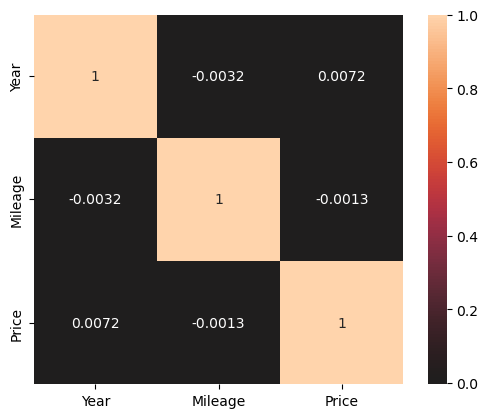

In [25]:
sns.heatmap(cor.corr(),annot=True,center=0,square=True)

# Year wise condition and its price difference visualisation

C:\Users\ELCOT\AppData\Local\Temp\ipykernel_45756\2269357462.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_yticklabels(a.get_yticklabels(),fontsize=20)


[None, None]

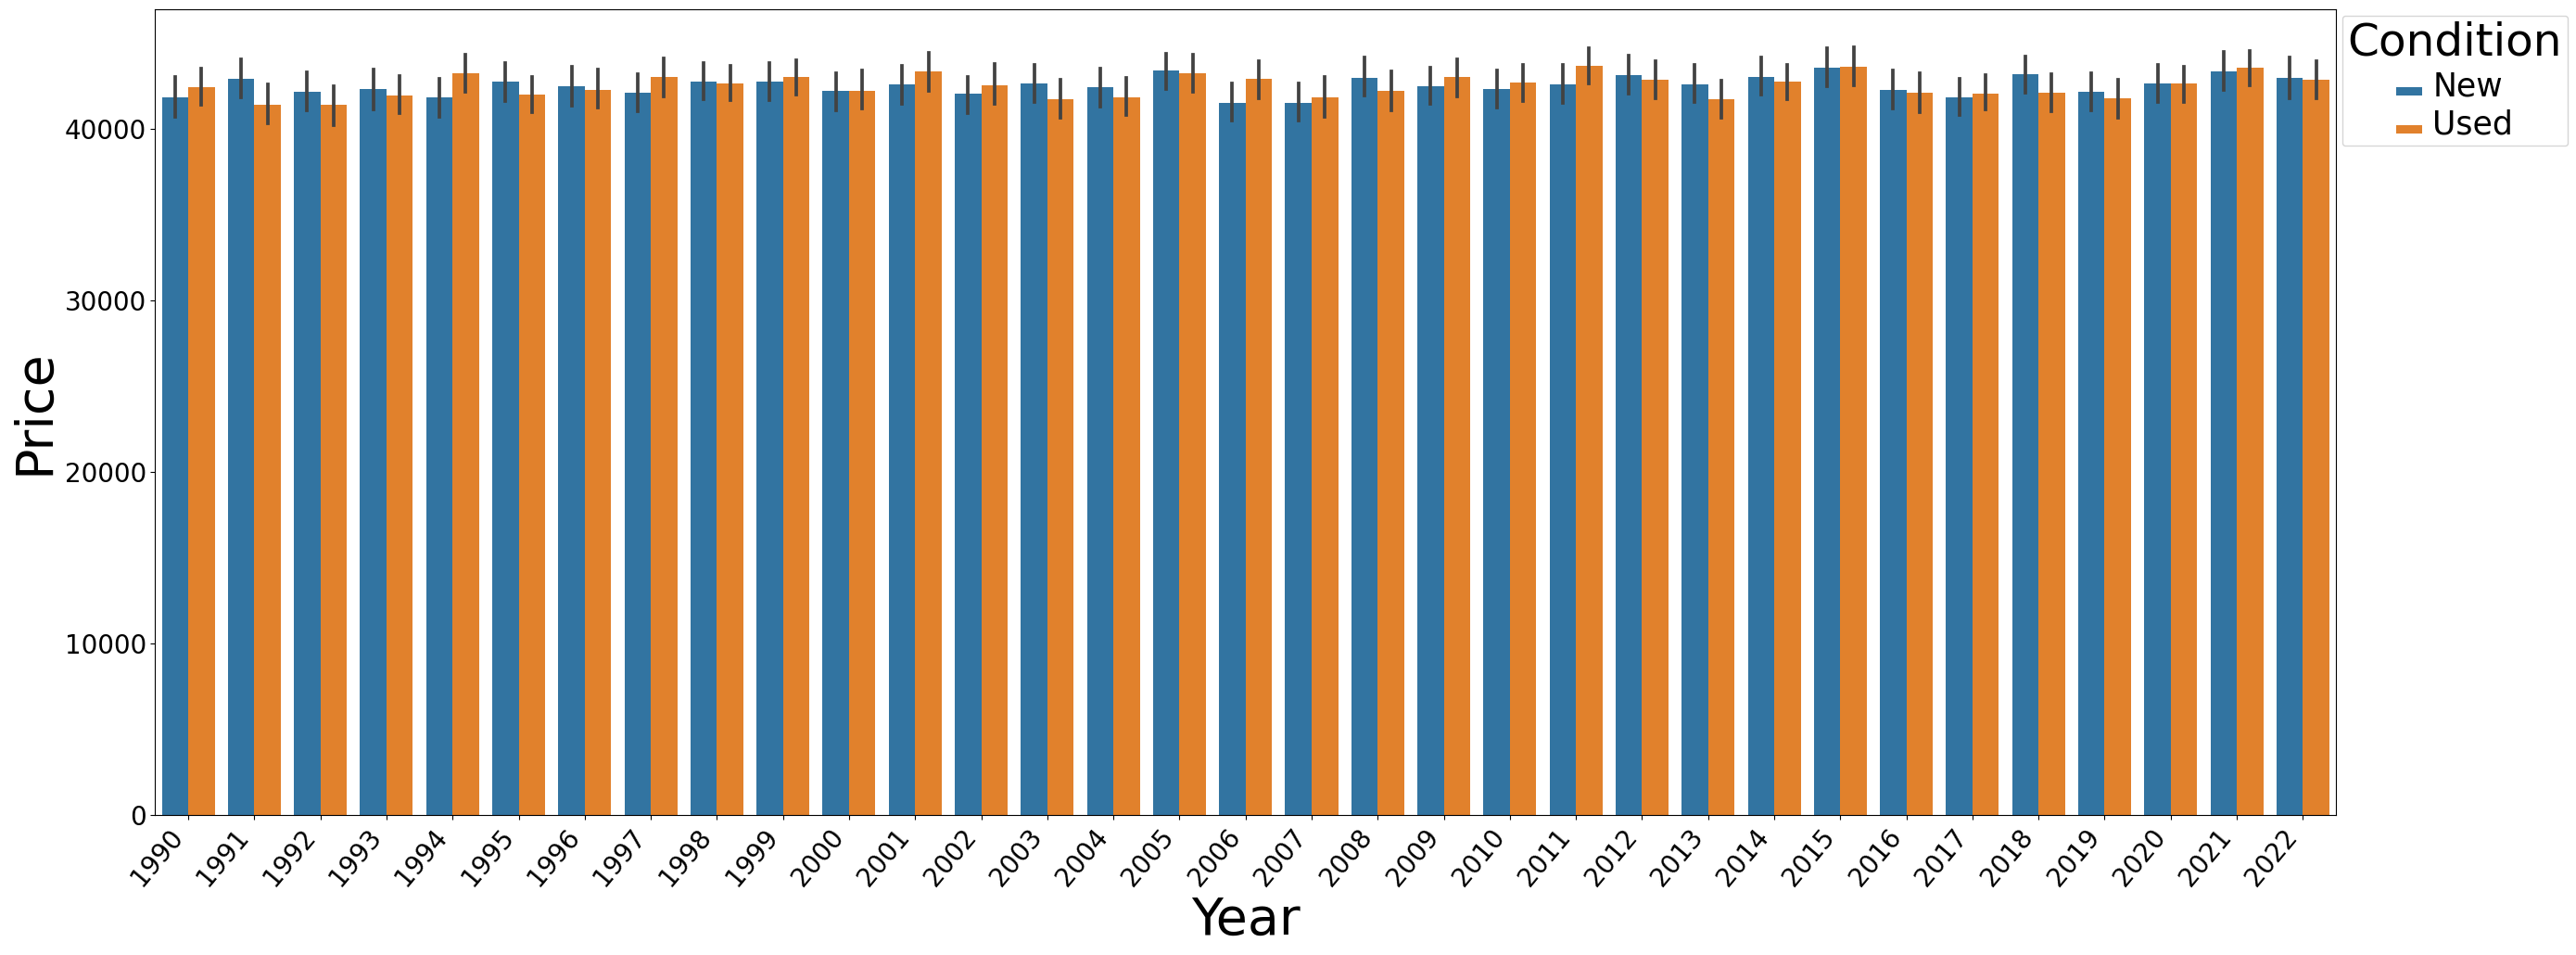

In [26]:
fig, ax = plt.subplots(figsize=(25,10))
a=sns.barplot(x=data['Year'],y=data['Price'],hue=data['Condition'])
a.set_xticklabels(a.get_xticklabels(),rotation=50,ha='right',fontsize=20)
a.set_yticklabels(a.get_yticklabels(),fontsize=20)
plt.tight_layout()
a.set_xlabel('Year',fontsize=40)
a.set_ylabel('Price',fontsize=40)
sns.move_legend(a,'upper left',bbox_to_anchor=(1,1))
plt.setp(a.get_legend().get_texts(),fontsize='25')
plt.setp(a.get_legend().get_title(),fontsize='35')


# Brand wise condition and its mileage difference visualisation

C:\Users\ELCOT\AppData\Local\Temp\ipykernel_45756\3281260151.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_yticklabels(a.get_yticklabels(),fontsize=20)


[None, None]

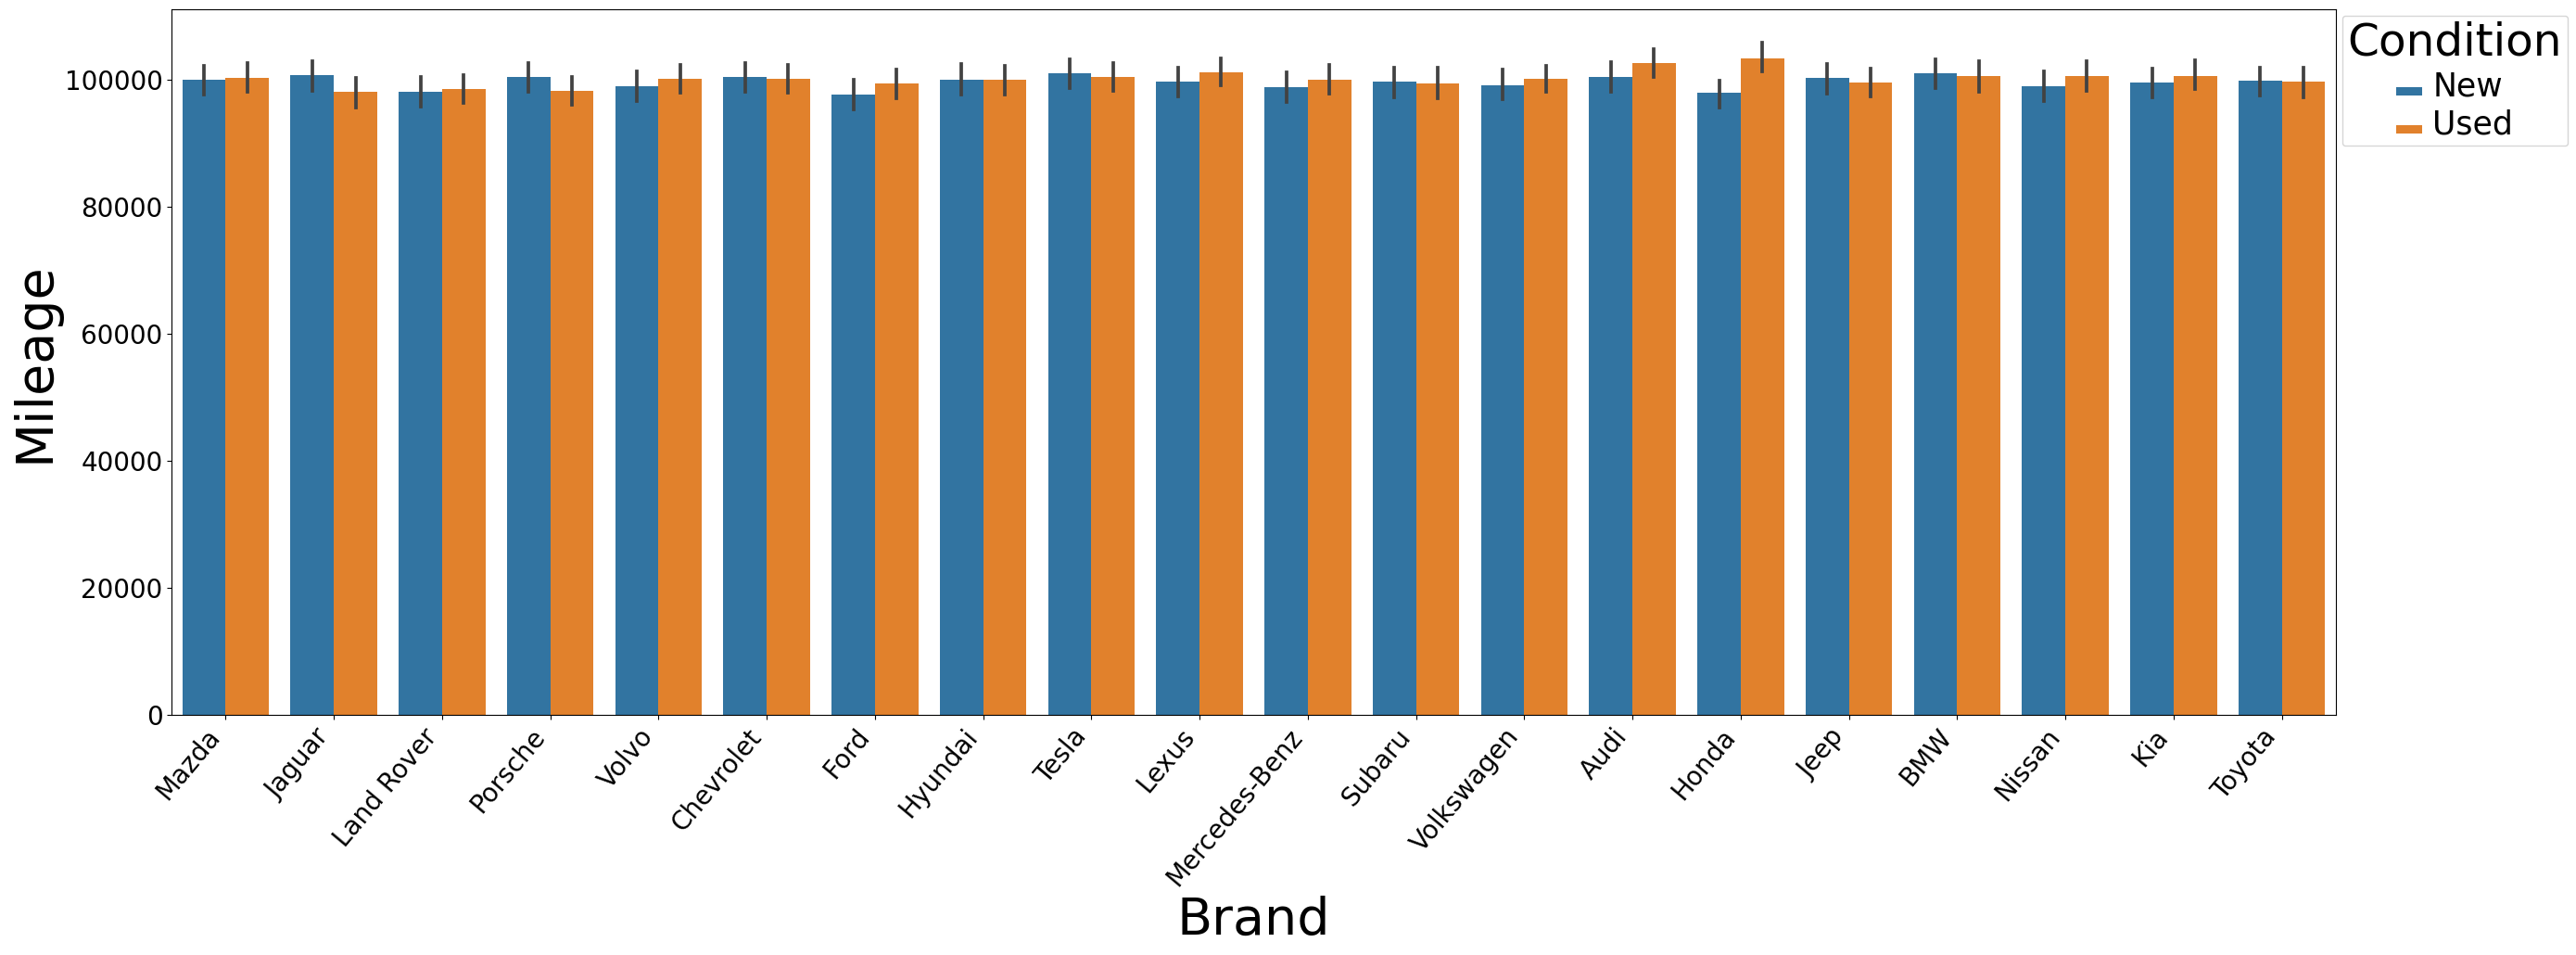

In [27]:
fig, ax = plt.subplots(figsize=(25,10))
a=sns.barplot(x=data['Brand'],y=data['Mileage'],hue=data['Condition'])
a.set_xticklabels(a.get_xticklabels(),rotation=50,ha='right',fontsize=20)
a.set_yticklabels(a.get_yticklabels(),fontsize=20)
plt.tight_layout()
a.set_xlabel('Brand',fontsize=40)
a.set_ylabel('Mileage',fontsize=40)
sns.move_legend(a,'upper left',bbox_to_anchor=(1,1))
plt.setp(a.get_legend().get_texts(),fontsize='25')
plt.setp(a.get_legend().get_title(),fontsize='35')

# Brand wise condition and its price difference visualisation

C:\Users\ELCOT\AppData\Local\Temp\ipykernel_45756\2928373899.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_yticklabels(a.get_yticklabels(),fontsize=20)


[None, None]

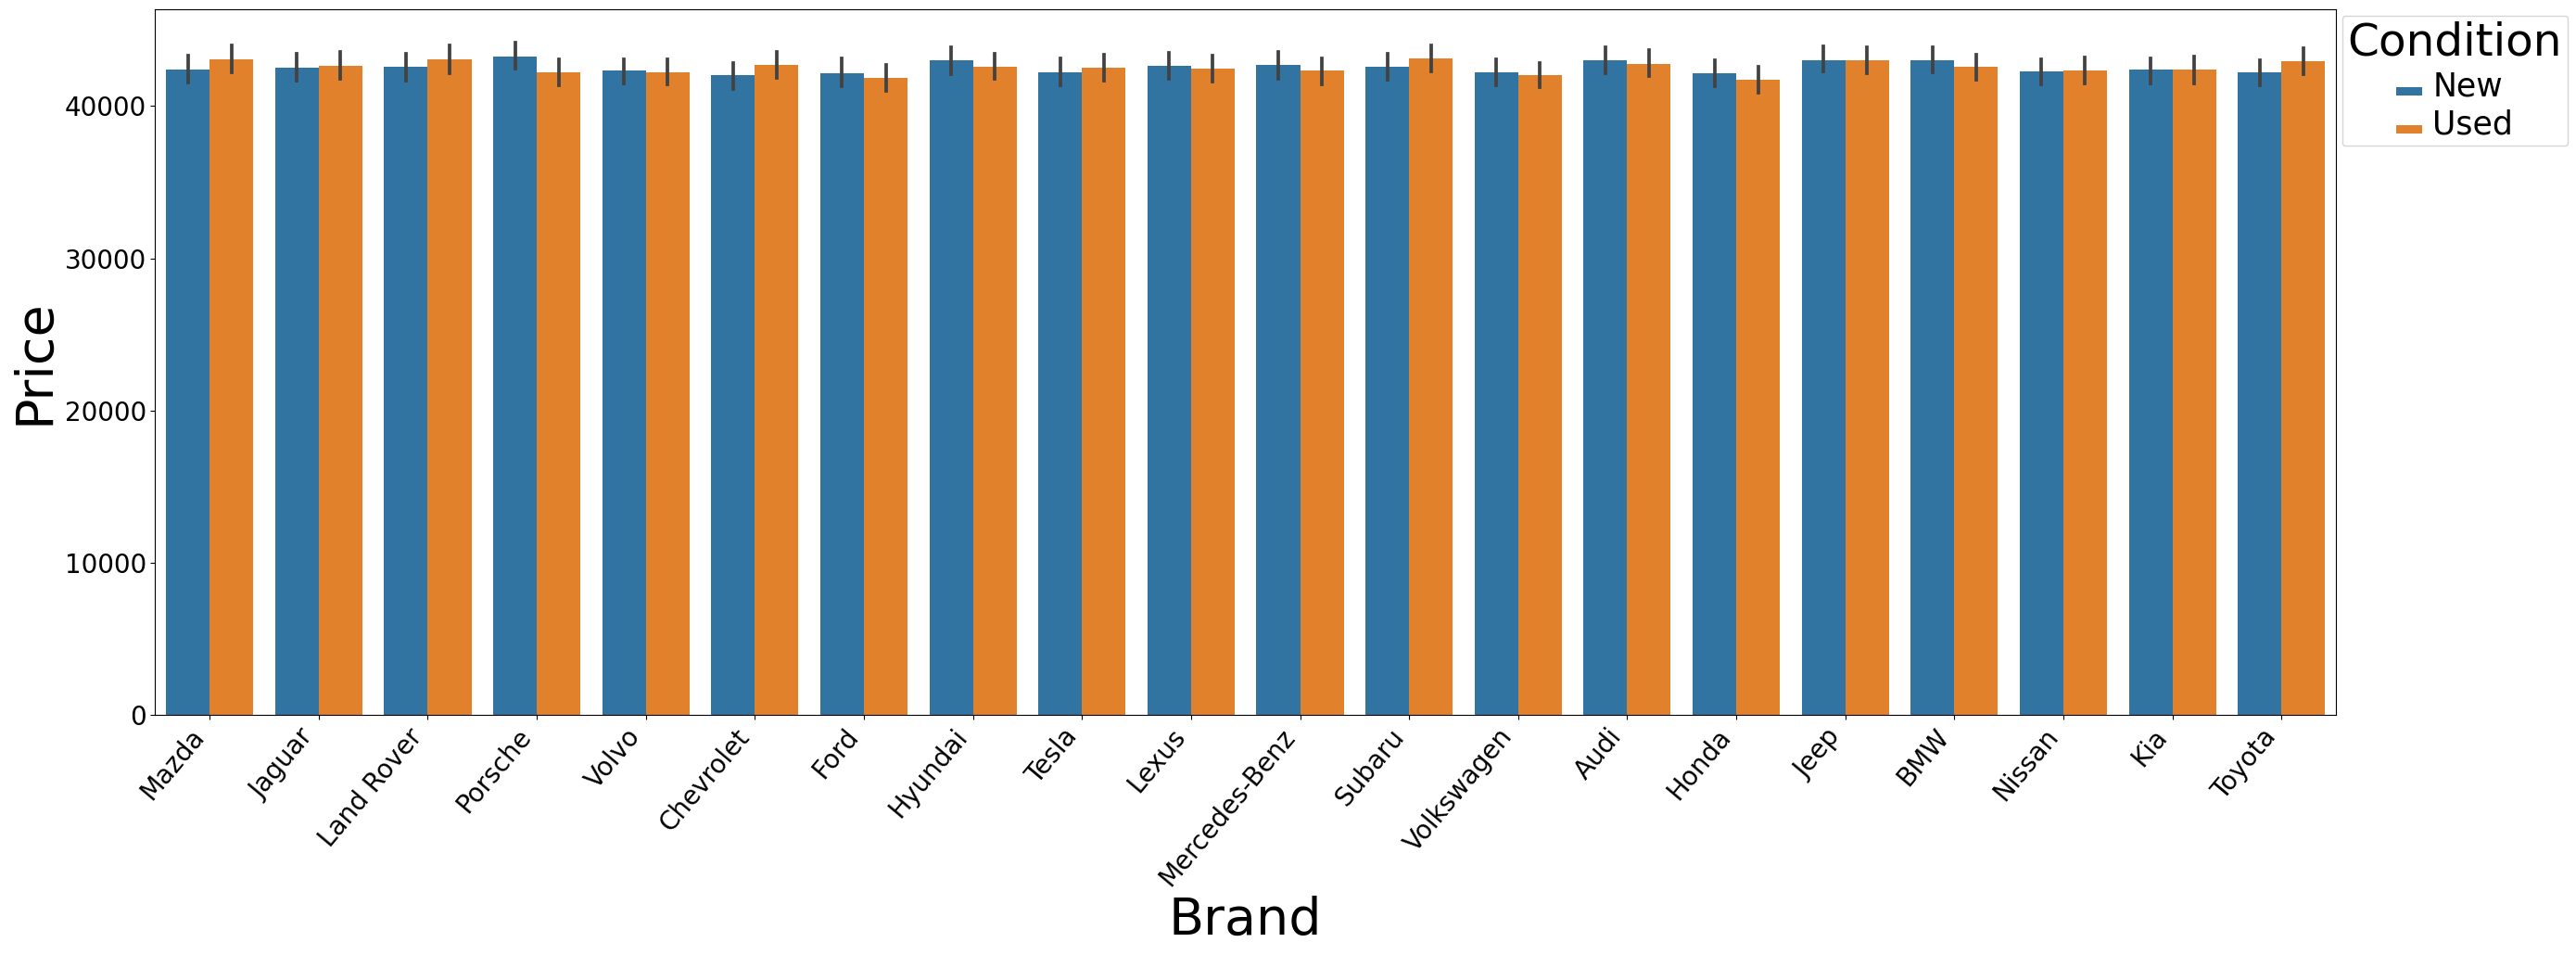

In [28]:
fig, ax = plt.subplots(figsize=(25,10))
a=sns.barplot(x=data['Brand'],y=data['Price'],hue=data['Condition'])
a.set_xticklabels(a.get_xticklabels(),rotation=50,ha='right',fontsize=20)
a.set_yticklabels(a.get_yticklabels(),fontsize=20)
plt.tight_layout()
a.set_xlabel('Brand',fontsize=40)
a.set_ylabel('Price',fontsize=40)
sns.move_legend(a,'upper left',bbox_to_anchor=(1,1))
plt.setp(a.get_legend().get_texts(),fontsize='25')
plt.setp(a.get_legend().get_title(),fontsize='35')


# Brand wise price difference visualisation

C:\Users\ELCOT\AppData\Local\Temp\ipykernel_45756\627570780.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_yticklabels(a.get_yticklabels(),fontsize=20)


Text(209.09722222222223, 0.5, 'Price')

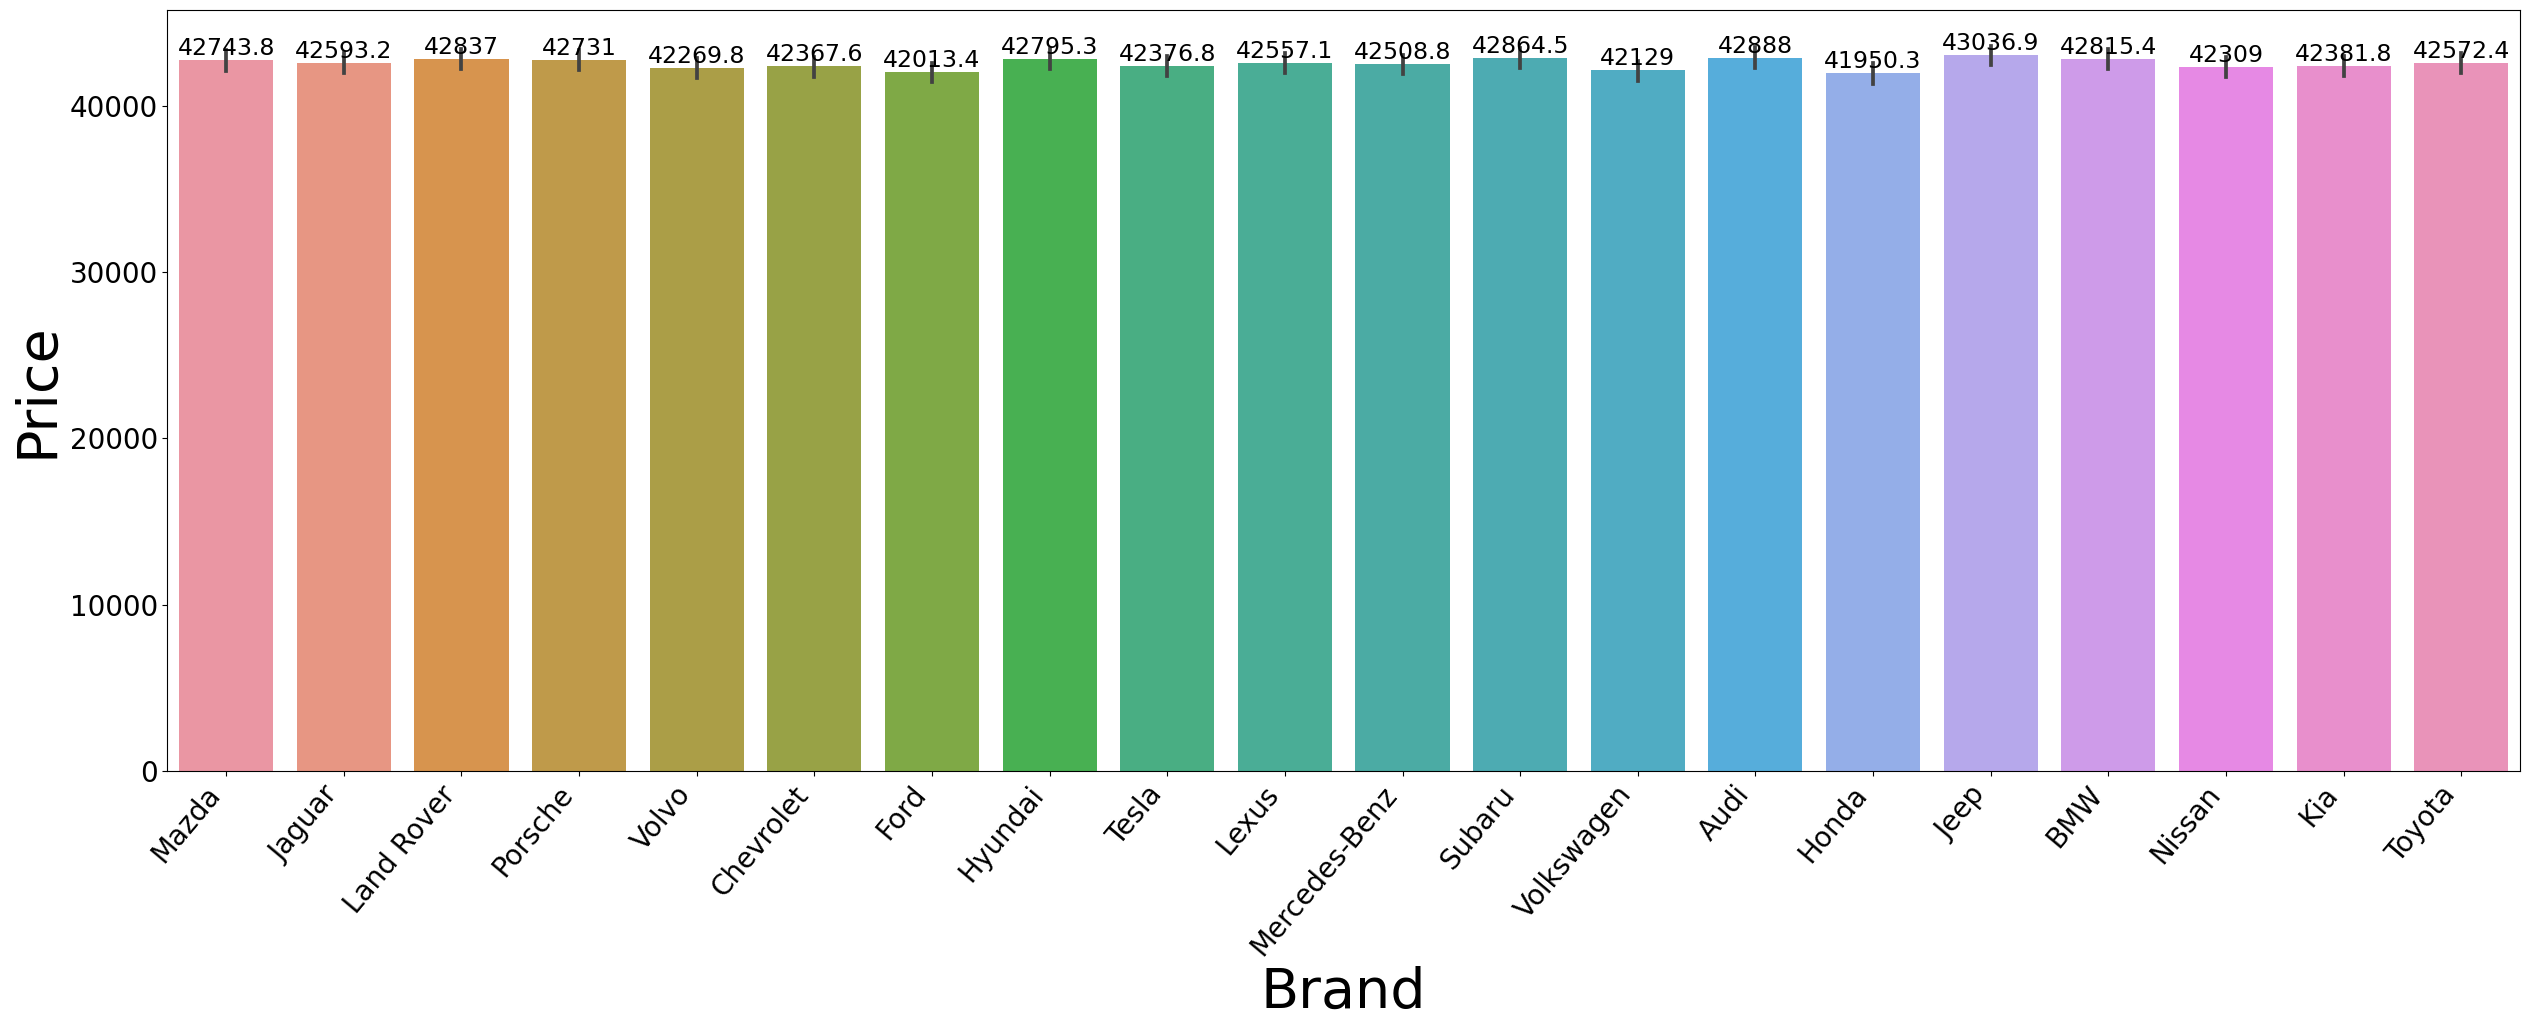

In [29]:
fig, ax = plt.subplots(figsize=(25,10))
a=sns.barplot(x=data['Brand'],y=data['Price'])
a.set_xticklabels(a.get_xticklabels(),rotation=50,ha='right',fontsize=20)
a.set_yticklabels(a.get_yticklabels(),fontsize=20)
plt.tight_layout()
for container in a.containers:
    a.bar_label(container,fontsize=17)
a.set_xlabel('Brand',fontsize=40)
a.set_ylabel('Price',fontsize=40)

# Brand wise color and its price difference visualisation

C:\Users\ELCOT\AppData\Local\Temp\ipykernel_45756\3006961905.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_yticklabels(a.get_yticklabels(),fontsize=25)


[None, None]

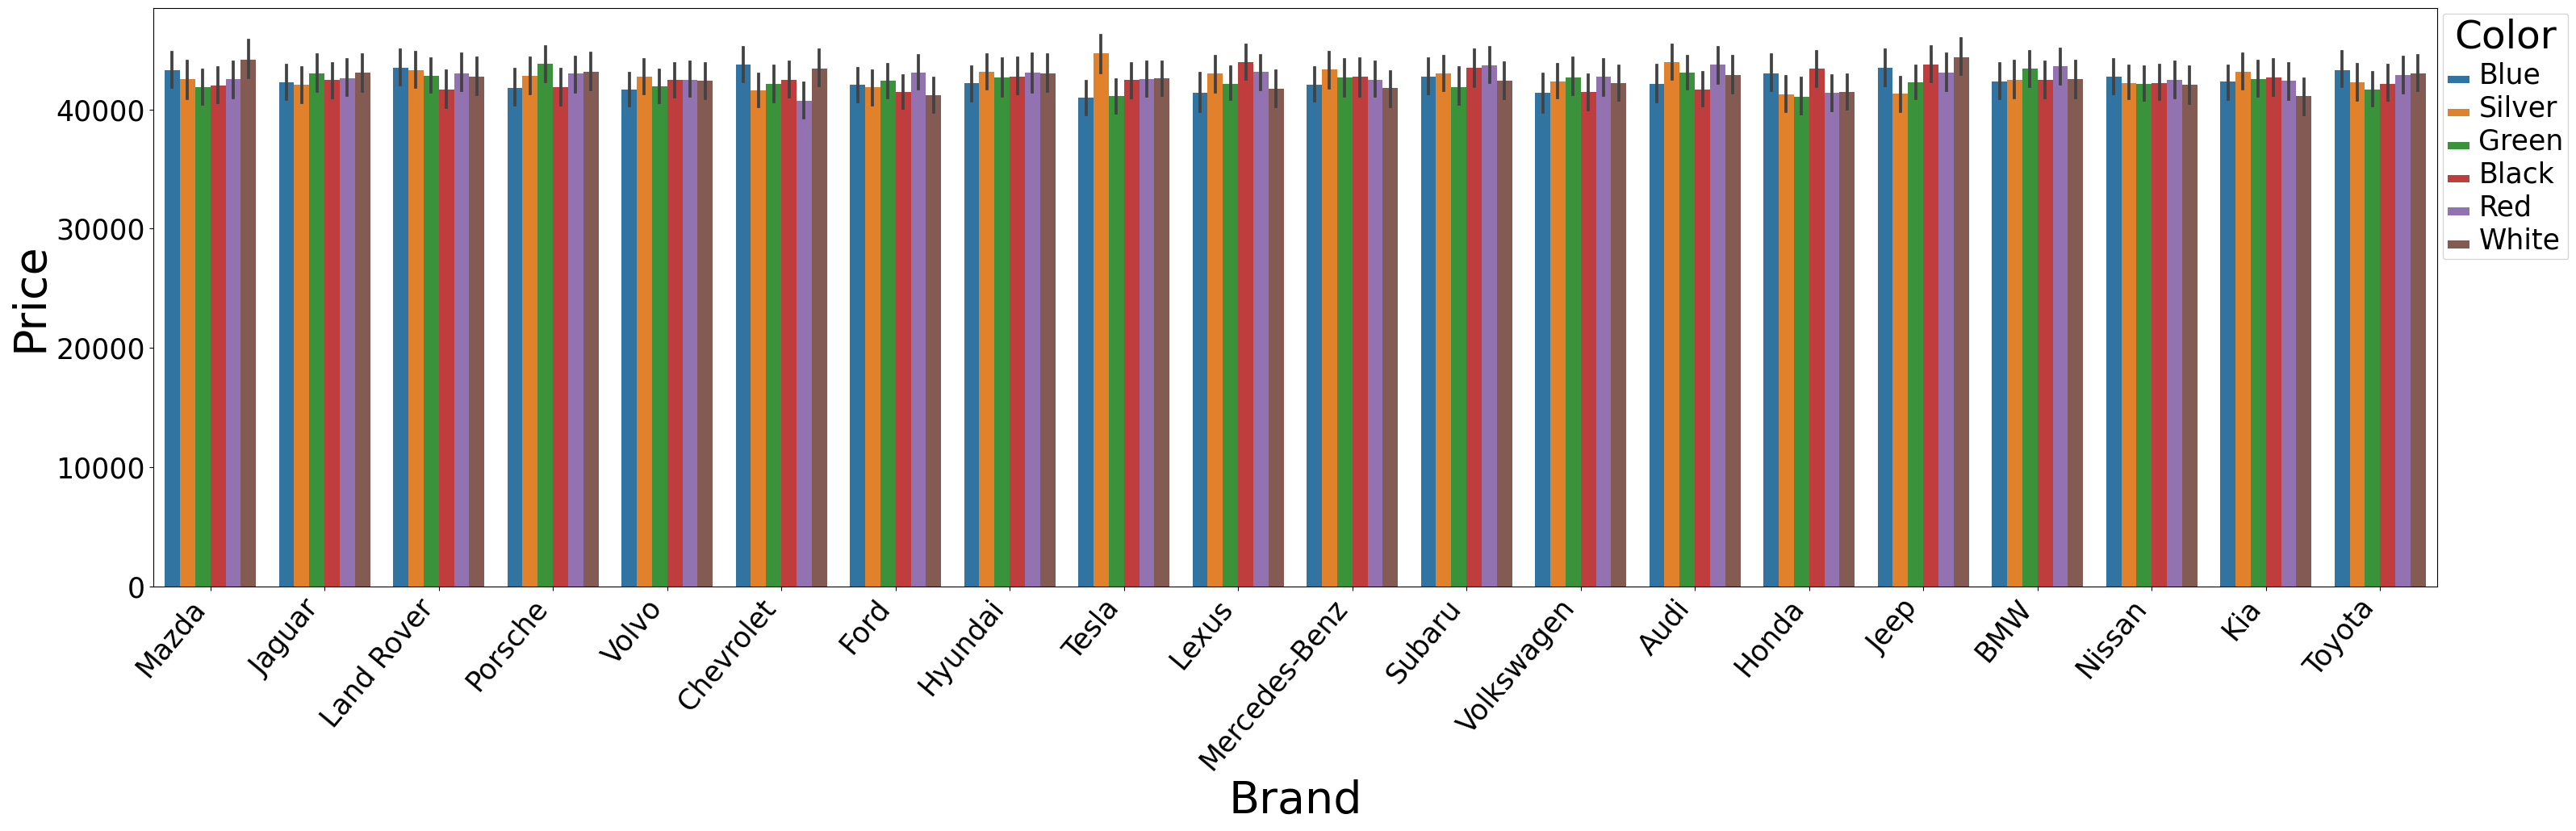

In [30]:
fig, ax = plt.subplots(figsize=(30,10))
a=sns.barplot(x=data['Brand'],y=data['Price'],hue=data['Color'])
a.set_xticklabels(a.get_xticklabels(),rotation=50,ha='right',fontsize=25)
a.set_yticklabels(a.get_yticklabels(),fontsize=25)
plt.tight_layout()
a.set_xlabel('Brand',fontsize=40)
a.set_ylabel('Price',fontsize=40)
sns.move_legend(a,'upper left',bbox_to_anchor=(1,1))
plt.setp(a.get_legend().get_texts(),fontsize=25)
plt.setp(a.get_legend().get_title(),fontsize=35)

In [31]:
data

,Brand,Model,Year,Color,Mileage,Price,Condition
0,Mazda,Generic Model 3,2003,Blue,22932,65732,New
1,Jaguar,Generic Model 2,2003,Silver,89937,58620,New
2,Land Rover,Generic Model 2,2022,Green,36616,50574,New
3,Porsche,Generic Model 2,1997,Black,82812,35436,Used
4,Land Rover,Generic Model 3,2000,Black,184616,63880,Used
...,...,...,...,...,...,...,...
99995,Lexus,Generic Model 1,2018,Red,24034,31762,New
99996,Nissan,Generic Model 1,2015,Green,30029,78376,New
99997,Land Rover,Generic Model 1,2009,White,42313,45681,Used
99998,Toyota,Tacoma,2010,White,120989,15085,Used


# Splitting the dataset into the training set and test set

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
future=data.drop('Condition',axis=1)
target=data['Condition']

In [34]:
x_train,x_test,y_train,y_test=train_test_split(pd.get_dummies(future),target,test_size=0.2)

In [35]:
x_train

,Year,Mileage,Price,Brand_Audi,Brand_BMW,Brand_Chevrolet,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Jaguar,...,Model_Pilot,Model_Prius,Model_RAV4,Model_Tacoma,Color_Black,Color_Blue,Color_Green,Color_Red,Color_Silver,Color_White
75437,2021,84826,9101,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
73079,1998,171109,53928,False,False,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False
9346,2020,75949,76111,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
49839,2013,66103,53415,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
37901,2008,187303,70930,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1991,133035,7616,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
87661,1997,106044,67551,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
22669,2010,198010,39445,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
5730,1996,129010,67137,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False


In [36]:
y_train

75437    Used
73079    Used
9346      New
49839    Used
37901    Used
         ... 
644      Used
87661     New
22669    Used
5730     Used
31542     New
Name: Condition, Length: 80000, dtype: object

In [37]:
x_test

,Year,Mileage,Price,Brand_Audi,Brand_BMW,Brand_Chevrolet,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Jaguar,...,Model_Pilot,Model_Prius,Model_RAV4,Model_Tacoma,Color_Black,Color_Blue,Color_Green,Color_Red,Color_Silver,Color_White
52391,2014,3401,38109,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
12987,2012,56086,52501,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
27476,2012,18835,54407,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
64276,2010,185910,13215,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
89797,2008,175884,10411,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61092,2022,121735,7637,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
15616,2011,128768,26206,False,False,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,False
34365,2019,18160,21666,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
58264,2017,90720,7571,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


# Fitting Naive bayes to the training set

In [38]:
from sklearn.naive_bayes import GaussianNB
NB=GaussianNB()

In [39]:
model=NB.fit(x_train,y_train)

# Predicting the test set results

In [40]:
y_pred=model.predict(x_test)

In [41]:
y_pred

array(['New', 'New', 'New', ..., 'Used', 'Used', 'New'], dtype='<U4')

# Machine performance score

In [42]:
model.score(x_test,y_pred)

1.0

In [43]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [44]:
accuracy_score(y_test,y_pred)

0.50165

# Making the confusion matrix

In [45]:
con=confusion_matrix(y_test,y_pred)

In [46]:
con

array([[5215, 4735],
       [5232, 4818]], dtype=int64)

# Confusion matrix Heatmap

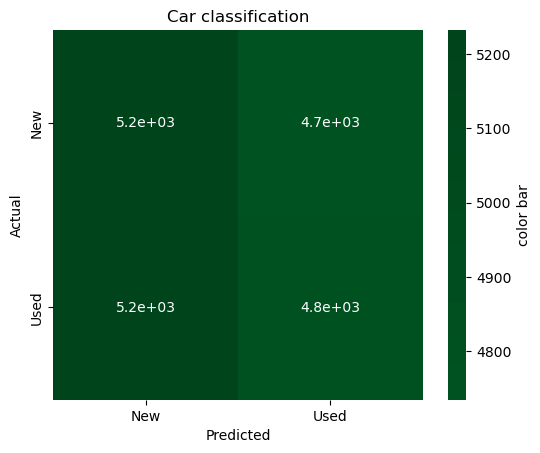

In [47]:
sns.heatmap(con,cmap='Greens',center=0,square=True,annot=True,cbar_kws={'orientation':'vertical','label':'color bar'},xticklabels=['New','Used'],yticklabels=['New','Used'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Car classification')
plt.show()